In [66]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv("/config/workspace/dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [70]:
#replacing zero value of all data by mean of the remaining data

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

<Axes: >

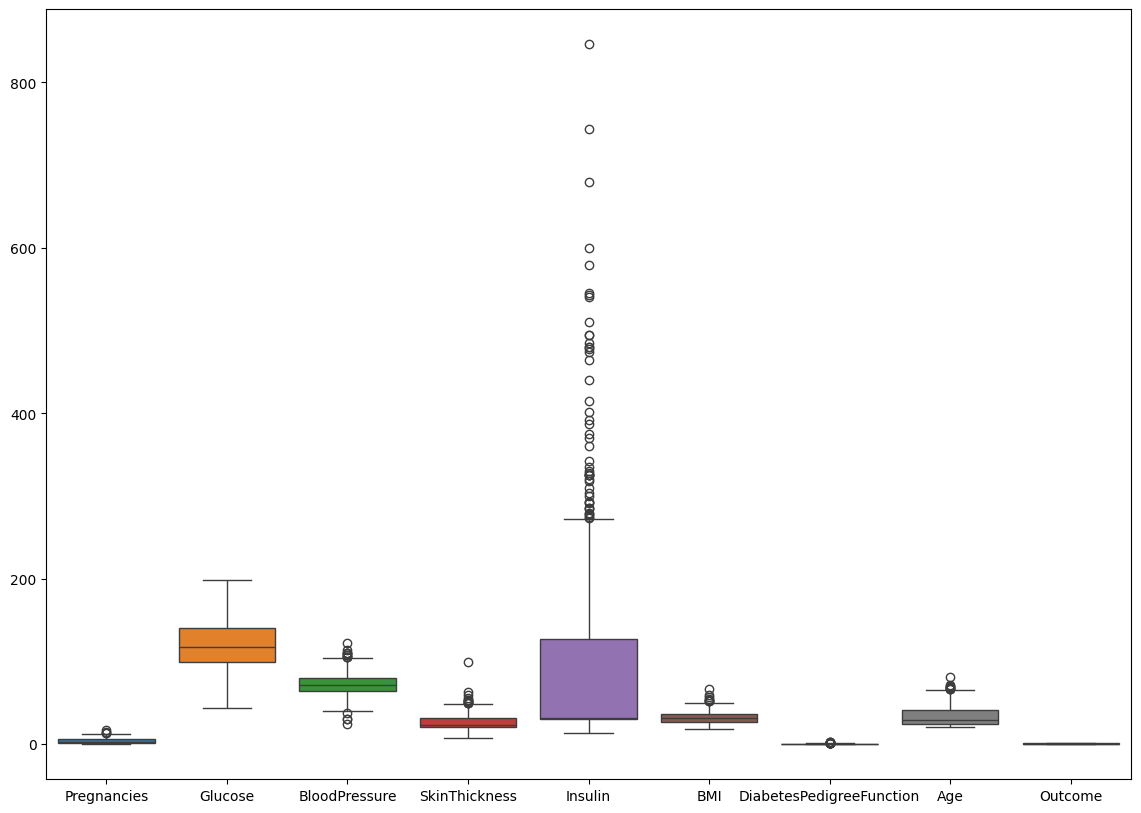

In [71]:
plt.subplots(figsize=(14,10))
sns.boxplot(data)

In [72]:
## dependent and independent
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [73]:
### test train split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)


In [74]:
import pickle
def scaler_standard(x_train,x_test):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    file = open("/config/workspace/model/standardScalar.pkl","wb")
    pickle.dump(scaler,file)
    file.close()

    return x_train_scaled,x_test_scaled

In [75]:
x_train_scaled,x_test_scaled = scaler_standard(x_train,x_test)

In [76]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [77]:
#### decision tree model training
import warnings
warnings.filterwarnings('ignore')


In [78]:
parameter={
    'criterion':['gini','entropy','log_class'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']

}

In [79]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()


In [80]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)
clf.fit(x_train,y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_class'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [81]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [82]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=None,splitter='random')

In [83]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [84]:
y_pred=classifier.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
accuracy_score(y_test,y_pred)


0.671875

In [86]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[129,   1],
       [ 62,   0]])

In [87]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [88]:
## now to dump this  model 
import pickle
file = open('/config/workspace/model/modelForPrediction','wb')
pickle.dump(classifier,file)
file.close()

# Algorithm 2: SupportVectorClassifier with Hyperparameter Tuning

In [89]:
param_grid = { 'C':[0.1,1,10,100,1000],
                'gamma':[1,0.1,0.01,0.001,0.0001],
                'kernel':['linear','rbf','polynomial']

}

In [90]:
grid =GridSearchCV(SVC(),param_grid=param_grid,refit = True,cv=5,verbose =3,scoring='accuracy')
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.817 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.704 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   0.3s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

In [ ]:
svc_clf=SVC(C=0.1,gamma=1,kernel='linear')
svc_clf.fit(x_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
##decision tree 
y_pred = classifier.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
## svc prediction
y_pred_svc = svc_clf.predict(x_test_scaled)

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_svc)
conf_mat

array([[130,   0],
       [ 62,   0]])

In [ ]:
###### both svc and decision have same accuracy but u didnt find it 
# for classification problem ,check the accuracy of all data....then the one with max accuracy will be taken as the perfect model